# Income Tax Comparions Between Different Countries

In [50]:
import numpy as np
import matplotlib.pyplot as plt

In [57]:
us_tax_brackets_perc = [0.1, 0.12, 0.22, 0.24, 0.32, 0.35, 0.37]
us_tax_brackets_income = [0, 11600, 47150, 100525, 191950, 243725, 609350]

au_tax_brackets_perc = [0, 0.16, 0.3, 0.37, 0.45]
au_tax_brackets_income =[0, 18200, 45000, 135000, 190000]

def tax_lists_to_dict(perc_list, bracket_list):
    tax_dict = []
    for i, perc in enumerate(perc_list):
        bracket_dict = {}
        bracket_dict["tax_percent"] = perc

        if (i+1) >= len(bracket_list):
            bracket_dict["income"] = [bracket_list[i], np.inf]
        else:
            bracket_dict["income"] = [bracket_list[i], bracket_list[i+1]]

        tax_dict.append(bracket_dict)


    return tax_dict

us_tax = tax_lists_to_dict(perc_list=us_tax_brackets_perc, bracket_list=us_tax_brackets_income)
au_tax = tax_lists_to_dict(perc_list=au_tax_brackets_perc, bracket_list=au_tax_brackets_income)


In [64]:

def calculate_taxes(tax_dict, income):
    total_tax = 0
    for bracket in tax_dict:
        amount_in_tax_bracket = min(bracket["income"][1] - bracket["income"][0], income - bracket["income"][0])
        amount_in_tax_bracket = max(0, amount_in_tax_bracket)
        total_tax += amount_in_tax_bracket*bracket["tax_percent"]

    return total_tax

def calculate_taxes_vectorized(tax_dict, incomes):
    tax_vec = []
    for income in incomes:
        tax_vec.append(calculate_taxes(tax_dict, income))

    return tax_vec

/var/folders/vc/7_9wq2015w7d7qkc9mxgc9500000gn/T/ipykernel_6787/3387085080.py:5: RuntimeWarning: invalid value encountered in divide
  us_effective_tax_rate = us_tax_dollars/income*100
/var/folders/vc/7_9wq2015w7d7qkc9mxgc9500000gn/T/ipykernel_6787/3387085080.py:8: RuntimeWarning: invalid value encountered in divide
  au_effective_tax_rate = au_tax_dollars/(income*usd_to_aud)*100


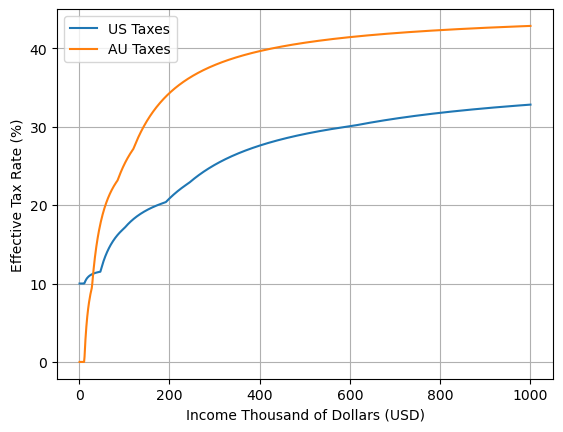

In [77]:
income = np.linspace(0,1000000, 1000)
usd_to_aud = 1.58

us_tax_dollars = calculate_taxes_vectorized(us_tax, income)
us_effective_tax_rate = us_tax_dollars/income*100

au_tax_dollars = calculate_taxes_vectorized(au_tax, income*usd_to_aud)
au_effective_tax_rate = au_tax_dollars/(income*usd_to_aud)*100

plt.figure()
plt.plot(income/1000, us_effective_tax_rate, label='US Taxes')
plt.plot(income/1000, au_effective_tax_rate, label='AU Taxes')
plt.legend()
plt.ylabel("Effective Tax Rate (%)")
plt.xlabel("Income Thousand of Dollars (USD)")
plt.grid()